In [18]:
from matplotlib import pyplot as plt
import microhapdb
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
all_markers = list(microhapdb.Marker.objectify(microhapdb.markers))
print(len(all_markers))

3053


In [12]:
markers = [m for m in all_markers if m.name not in microhapdb.repeats.index and len(m) < 250 and m.data.Ae > 2.5]
print(len(markers))

1114


In [13]:
lengths = [len(m) for m in markers]
aes = [m.data.Ae for m in markers]

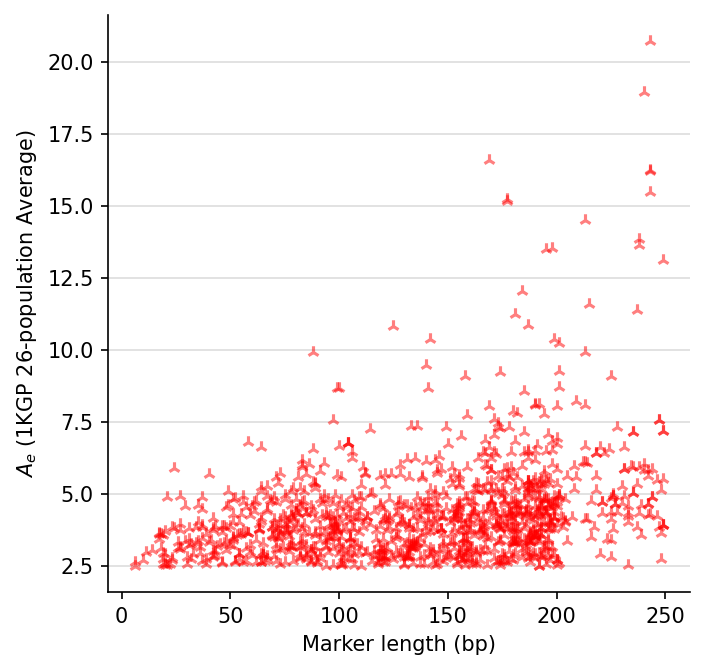

In [14]:
plt.figure(figsize=(5, 5), dpi=150)
plt.scatter(lengths, aes, marker="2", color="red", alpha=0.5)
plt.ylabel("$A_e$ (1KGP 26-population Average)")
plt.xlabel("Marker length (bp)")
#plt.legend(loc="upper left")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().yaxis.grid(True, color="#DDDDDD")
plt.gca().set_axisbelow(True)

In [29]:
bp1, bp2, bp3 = np.quantile(aes, [0.99, 0.97, 0.95])
print(bp1, bp2, bp3)

13.533499999999993 8.62714999999999 7.323149999999999


In [30]:
top = [m for m in markers if m.data.Ae > bp1]
top_loci = set([m.locus for m in top])
middle = [m for m in markers if m.data.Ae > bp2 and m.locus not in top_loci]
middle_loci = set([m.locus for m in middle])
bottom = [m for m in markers if m.data.Ae > bp3 and m.locus not in top_loci and m.locus not in middle_loci]
bottom_loci = set([m.locus for m in bottom])
print(f"Top={len(top_loci)} Middle={len(middle_loci)} Bottom={len(bottom_loci)}")

Top=9 Middle=13 Bottom=18


In [31]:
print(*top_loci)

mh07WL-022 mh01KK-212 mh03LV-06 mh01WL-005 mh10WL-031 mh12KK-201 mh06WL-051 mh04WL-052 mh01WL-006


In [36]:
!microhapdb marker --columns nxas --query "Extent < 250 & Ae > 13.53" mh07WL-022 mh01KK-212 mh03LV-06 mh01WL-005 mh10WL-031 mh12KK-201 mh06WL-051 mh04WL-052 mh01WL-006

         Name  NumVars  Extent     Ae     Start                   Source
mh01KK-212.v1       11     243 16.198 202647419 Gandotra2020;NimaGen2023
mh01KK-212.v2       17     243 16.242 202647419              Pakstis2021
mh01KK-212.v4        8     243 15.488 202647419                 Yu2022G3
mh01WL-005.v1        5     169 16.593 212172159        Yu2022G1;Yu2022G2
mh01WL-006.v3        7     213 14.513 236518814              NimaGen2023
 mh03LV-06.v1       16     198 13.540  11914401          Voskoboinik2018
mh04WL-052.v1        9     243 20.722   2303789                 Yu2022G3
   mh06WL-051        8     240 18.952   1708564         Yu2022G3;Zhu2023
mh07WL-022.v2        5     238 13.637 115873343         Yu2022G3;Zhu2023
   mh10WL-031        6     238 13.828   3825864                 Yu2022G3
mh12KK-201.v1       12     177 15.170  27647394 Gandotra2020;NimaGen2023
mh12KK-201.v2       15     177 15.217  27647394              Pakstis2021


In [37]:
print(*middle_loci)

mh12SHY-001 mh16WL-038 mh01WL-007 mh13WL-001 mh07SCUZJ-0502291 mh13USC-13qA mh06WL-017 mh17FHL-005 mh12SCUZJ-0392651 mh02WL-002 mh01WL-010 mh10WL-012 mh03FHL-001


In [38]:
!microhapdb marker --columns nxas --query "Extent < 250 & Ae < 13.53 & Ae > 8.63" mh12SHY-001 mh16WL-038 mh01WL-007 mh13WL-001 mh07SCUZJ-0502291 mh13USC-13qA mh06WL-017 mh17FHL-005 mh12SCUZJ-0392651 mh02WL-002 mh01WL-010 mh10WL-012 mh03FHL-001

                Name  NumVars  Extent     Ae     Start                             Source
          mh01WL-007        4     158  9.081 107376744 Yu2022G1;Yu2022G2;Yu2022G3;Zhu2023
       mh01WL-010.v2       10     237 11.378 168483954                           Yu2022G3
       mh01WL-010.v1        7     187 10.860 168484004                  Yu2022G1;Yu2022G2
       mh02WL-002.v2        5     201 10.233 204497437                           Yu2022G3
       mh02WL-002.v4        4     201  9.258 204497437                             Du2023
      mh03FHL-001.v2        4     213  9.914  11583728                           Yu2022G3
       mh06WL-017.v2       16     100  8.679  32663167                           Yu2022G4
       mh06WL-017.v1       32     199 10.392  32663167                  Yu2022G1;Yu2022G2
mh07SCUZJ-0502291.v1        5     225  9.083 149320697                            Zhu2023
       mh10WL-012.v2        6      88  9.940   4259581                           Yu2022G4
       mh1

In [43]:
microhapdb.markers[microhapdb.markers.Name.isin([m.name for m in middle])].sort_values(["Extent", "Ae"])[["Name", "NumVars", "Extent", "Ae", "Start"]]

,Name,NumVars,Extent,Ae,Start
1687,mh10WL-012.v2,6,88,9.940,4259581
1109,mh06WL-017.v2,16,100,8.679,32663167
2572,mh16WL-038,7,125,10.836,88727378
2011,mh12SHY-001.v2,8,140,9.469,13420563
2141,mh13USC-13qA.v2,8,142,10.367,32979370
110,mh01WL-007,4,158,9.081,107376744
2662,mh17FHL-005.v2,4,174,9.219,78268206
2204,mh13WL-001.v1,7,181,11.232,94252435
1688,mh10WL-012.v1,7,184,12.024,4259581
137,mh01WL-010.v1,7,187,10.860,168484004
